# **Beer Rating Prediction**

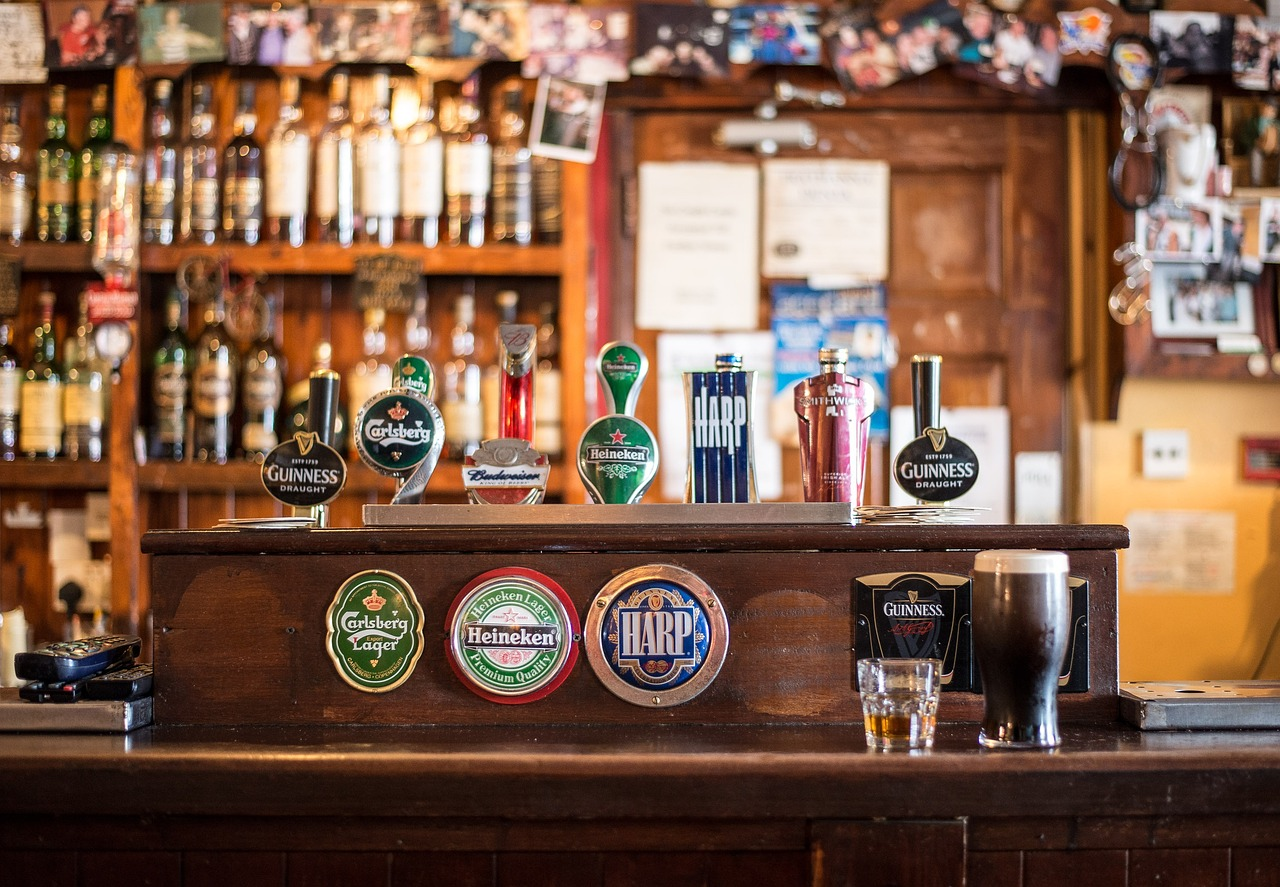

# Problem Statement

This case study is based on Beer data-set of 2020 to bulid Machine Learning model which predicts the overall rating of the beer.

This prediction problem has been formulated as regression problem.



# Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
from scipy.sparse import hstack

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load the Dataset

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

In [57]:
df = pd.read_csv('/content/drive/MyDrive/Beer_case_study/train.csv')

# Dataset description

● **index** - an identifier for the review

● **beer/ABV** - the alcohol by volume of the beer

● **beer/beerId** - a unique ID indicating the beer reviewed

● **beer/brewerId** - a unique ID indicating the brewery

● **beer/name** - name of the beer

● **beer/style** - style of the beer

● **review/appearance** - rating of the beer's appearance (1.0 to 5.0)

● **review/aroma** - rating of the beer's aroma (1.0 to 5.0)

● **review/overall** - rating of the beer overall (1.0 to 5.0)

● **review/palate** - rating of the beer's palate (1.0 to 5.0)

● **review/taste** - rating of the beer's taste (1.0 to 5.0)

● **review/text** - the text of the review

● **review/timeStruct** - a dict specifying when the review was submitted

● **review/timeUnix**

● **user/ageInSeconds** - age of the user in seconds

● **user/birthdayRaw**

● **user/birthdayUnix**

● **user/gender** - gender of the user (if specified)

● **user/profileName** - profile name of the user

# Understand the data

In [ ]:
df.head()

In [63]:
df.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [58]:
df.shape

(37500, 19)

> Rows = 37500

> Columns = 19

In [59]:
df.size

712500

In [60]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [62]:
df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

# Feature Selection

In [64]:
df=df[['beer/beerId', 'beer/ABV', 'beer/brewerId', 'beer/name', 'beer/style', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/text', 'user/profileName','user/gender','review/overall']]

In [65]:
df.head()

,beer/beerId,beer/ABV,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text,user/profileName,user/gender,review/overall
0,46634,5.0,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,RblWthACoz,NaN,4.0
1,3003,11.0,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,BeerSox,NaN,3.5
2,961,4.7,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,mschofield,Male,3.5
3,429,4.4,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,3.0,3.0,First thing I noticed after pouring from green...,molegar76,Male,2.5
4,4904,4.4,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Brewbro000,NaN,3.0


# Data Cleaning

In [66]:
df = df.dropna(subset=['review/text'])

In [67]:
df.shape

(37490, 13)

In [68]:
df = df.dropna(subset = ['review/text'])

In [69]:
df = df.dropna(subset = ['user/profileName'])

In [70]:
df['user/gender'].fillna('missing',inplace=True)

In [71]:
df.isnull().sum()

beer/beerId          0
beer/ABV             0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/palate        0
review/taste         0
review/text          0
user/profileName     0
user/gender          0
review/overall       0
dtype: int64

In [72]:
df = df.reset_index()

# Text Preprocessing

In [73]:
ps=SnowballStemmer(language='english')
stop_words=stopwords.words('english')
def conv(data,col):
  corpus=[]
  for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df[col][i])
    review=review.lower()
    review= word_tokenize(review)
    review= [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)
  return corpus

In [74]:
df['beer/name']=conv(df,'beer/name')

In [75]:
df['beer/style']=conv(df,'beer/style')

In [76]:
df['review/text']=conv(df,'review/text')

In [77]:
df['beer/name']=df['beer/name'].astype('category')
df['beer/style']=df['beer/style'].astype('category')

#Exploratory Data Analysis

####Univariate Analysis

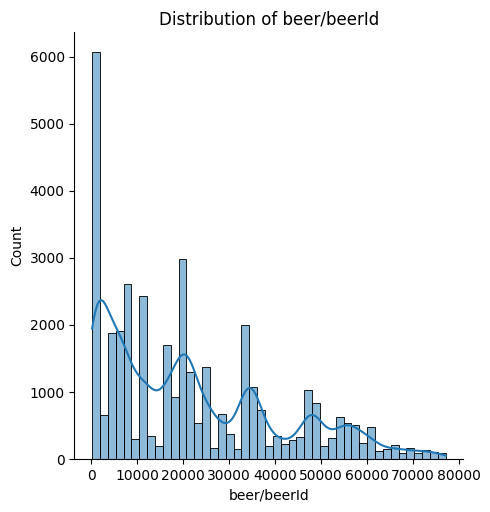

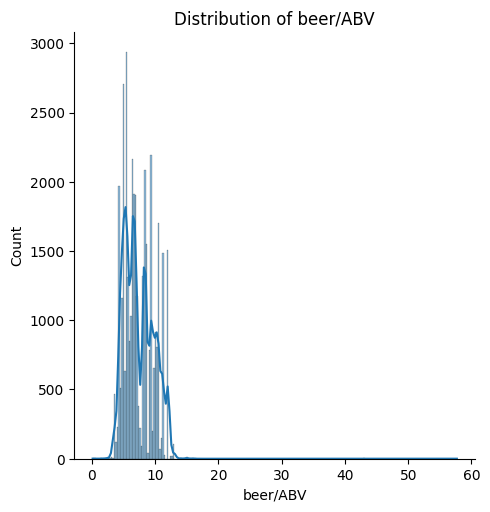

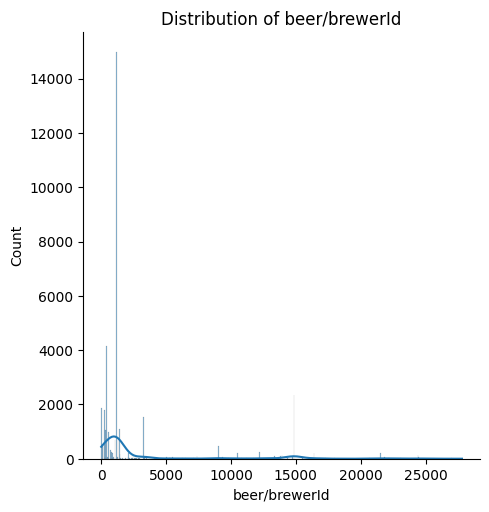

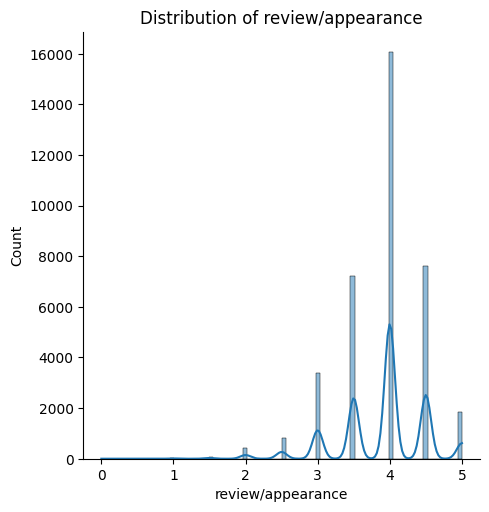

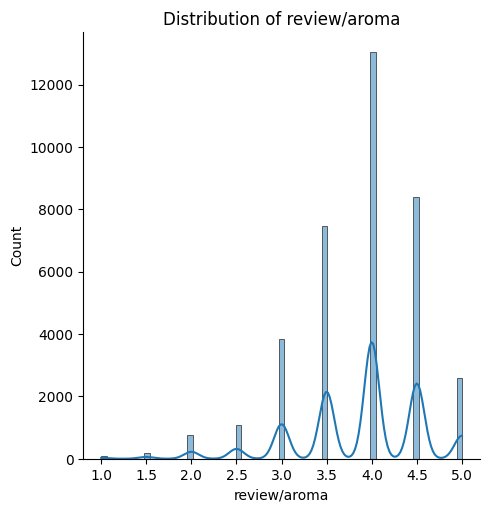

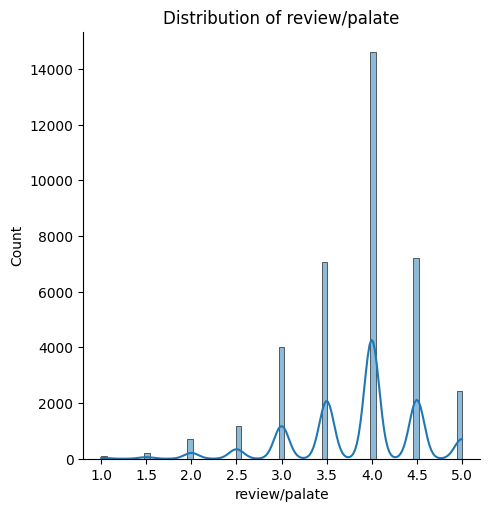

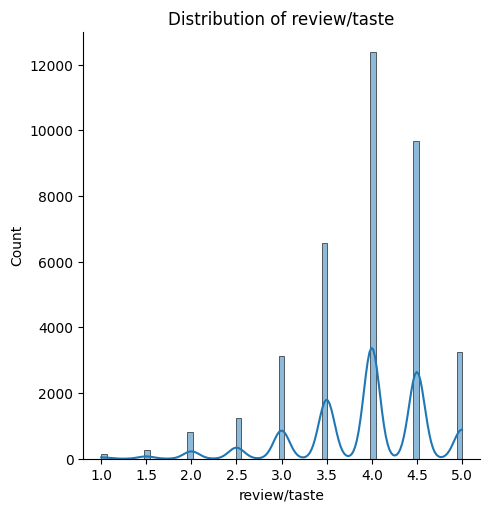

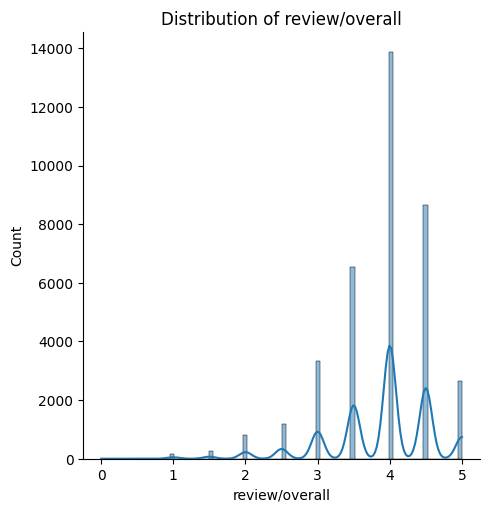

In [78]:
for i in df.describe().columns[1:]:

  sns.displot(df[i],kde=True)
  plt.title(f"Distribution of {i}")

  plt.show()


####Multivariate analysis

<Axes: >

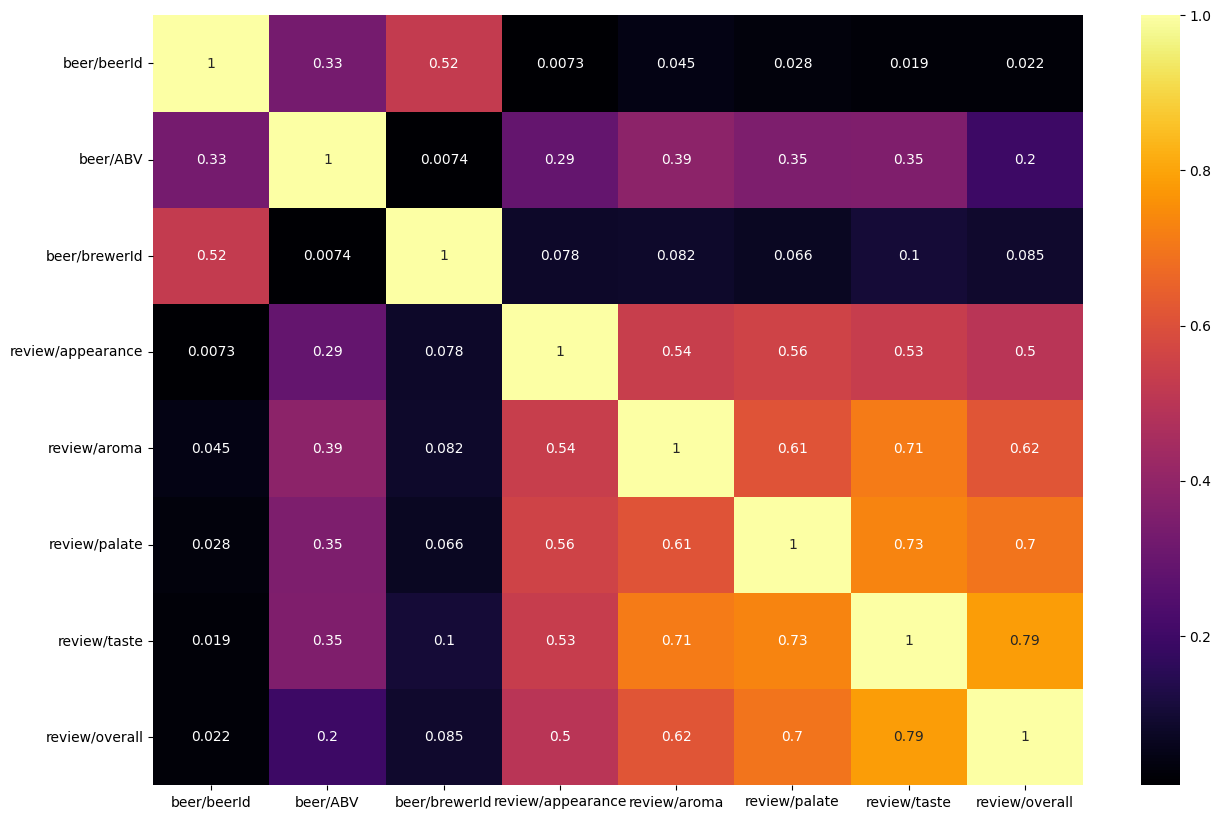

In [114]:
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='inferno')

# Feature Engineering

In [80]:
df.head()

,index,beer/beerId,beer/ABV,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text,user/profileName,user/gender,review/overall
0,0,46634,5.0,14338,chiostro,herb spice beer,4.0,4.0,4.0,4.0,pour cloud gold thin white head nose quit flor...,RblWthACoz,missing,4.0
1,1,3003,11.0,395,beard pat barleywin,american barleywin,4.0,3.5,3.5,3.0,oz bottl oz snifter deep rubi red hue one fing...,BeerSox,missing,3.5
2,2,961,4.7,365,naughti nelli ale,american pale ale apa,3.5,4.0,3.5,3.5,first enjoy brewpub year ago final manag get b...,mschofield,Male,3.5
3,3,429,4.4,1,pilsner urquel,czech pilsen,3.0,3.0,3.0,3.0,first thing notic pour green bottl glass skunk...,molegar76,Male,2.5
4,4,4904,4.4,1417,black sheep ale special,english pale ale,4.0,3.0,3.5,2.5,pour amber one finger head strong pour head re...,Brewbro000,missing,3.0


In [81]:
df.drop(['index','user/profileName'],axis=1,inplace=True)

In [82]:
x_train,x_test,y_train,y_test = train_test_split(df,df['review/overall'],test_size=0.3,random_state = 42)

####Convert Numerical data into vector

In [83]:
def vector(x,n):
  scalers = StandardScaler()
  scalers.fit(x.values.reshape(-1,1))
  s_train = scalers.transform(x.values.reshape(-1,1))
  s_test = scalers.transform(n.values.reshape(-1,1))
  return s_train,s_test

In [84]:
s_train_0,s_test_0 = vector(x_train['beer/beerId'],x_test['beer/beerId'])

In [85]:
s_train_1,s_test_1 = vector(x_train['beer/brewerId'],x_test['beer/brewerId'])

In [86]:
s_train_2,s_test_2=vector(x_train['beer/ABV'],x_test['beer/ABV'])

In [87]:
s_train_3,s_test_3=vector(x_train['review/appearance'],x_test['review/appearance'])

In [88]:
s_train_4,s_test_4=vector(x_train['review/aroma'],x_test['review/aroma'])

In [89]:
s_train_5,s_test_5=vector(x_train['review/palate'],x_test['review/palate'])

In [90]:
s_train_6,s_test_6=vector(x_train['review/taste'],x_test['review/taste'])

####Convert categorical data into vector

In [91]:
def catt_vec(m,o):
  counter=Counter()
  for i in m.values:
    counter.update(str(i).split())
    category_dict=dict(counter)
    sorted_dict=dict(sorted(category_dict.items(),key=lambda x:x[1]))
    vec=CountVectorizer(vocabulary=list(sorted_dict.keys()),binary=True)
    vec.fit(m.values)
    train=vec.transform(m.values)
    test=vec.transform(o.values)
    return train,test

In [92]:
s_train_7,s_test_7=catt_vec(x_train['beer/name'],x_test['beer/name'])

In [93]:
s_train_8,s_test_8=catt_vec(x_train['beer/style'],x_test['beer/style'])

In [94]:
s_train_9,s_test_9=catt_vec(x_train['user/gender'],x_test['user/gender'])

####Convert text data into vector

In [95]:
tf=TfidfVectorizer()

In [96]:
tf.fit(list(x_train['review/text']),list(x_test['review/text']))

TfidfVectorizer()

In [97]:
s_train_10 = tf.transform(x_train['review/text'])
s_test_10=tf.transform(x_test['review/text'])

# Train -Test Split

In [98]:
x_training = hstack((s_train_0,s_train_1,s_train_2,s_train_3,s_train_4,s_train_5,s_train_6,s_train_7,s_train_8,s_train_9,s_train_10)).tocsr()

In [99]:
x_testt = hstack((s_test_0,s_test_1,s_test_2,s_test_3,s_test_4,s_test_5,s_test_6,s_test_7,s_test_8,s_test_9,s_test_10)).tocsr()

In [100]:
y_train = np.array(list(y_train))

In [101]:
y_test = np.array(list(y_test))

# Modelling

####RandomForest Regression

In [102]:
rfr = RandomForestRegressor(max_depth=8,n_estimators=80)
rfr.fit(x_training,y_train)

RandomForestRegressor(max_depth=8, n_estimators=80)

In [103]:
y_pred_rf = rfr.predict(x_testt)

In [104]:
score_rf =  r2_score(y_pred_rf,y_test)

In [105]:
score_rf


0.5204405711035329

####XGBForest Regression

In [106]:
xgb = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 500)

In [107]:
xgb.fit(x_training,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [108]:
y_pred_xgb =xgb.predict(x_testt)

In [109]:
score_xgb=r2_score(y_pred_xgb,y_test)

In [110]:
score_xgb

0.5684325872842335

#Evaluation

In [111]:


Report = pd.DataFrame(data={'model':['RandomForest regression','Xgboost regression'],'R2_score':[score_rf,score_xgb]})
Report

,model,R2_score
0,RandomForest regression,0.520441
1,Xgboost regression,0.568433


# Conclusion

- Based on the results it can be concluded that XGBoost has performed best.

## Note

- I have taken only those features which are more important for prediction